In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


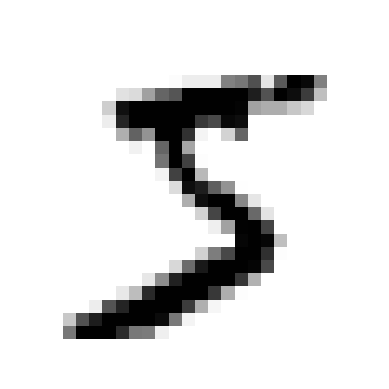

Solution :5


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# print(X[0:1])
some_digit = X[0:1]
some_digit_image = some_digit.reshape(28, 28)
# print(some_digit_image)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

print('Solution :' + y[0]) # string

In [4]:
import numpy as np
y = y.astype(np.uint8) # cast y to integers
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [6]:
knn_clf.predict(some_digit)

array([5], dtype=uint8)

In [7]:
print("accuracy KNN (test): {:2f}".format(knn_clf.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)